In [2]:
import pandas as pd  #for data manipulation.
import numpy as np   #for scientific computing.
import sklearn       #for machine learning
import seaborn as sns #visualization package
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #plotting & visualization.

%matplotlib inline  
#to present the visualizations as a part of the notebook itself
#importing the inbuilt dataset in sklearn package for performing regression analysis.
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
diabetes.feature_names   #checking the feature names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
diabetes.data.shape  #checking the shape of data

(442, 10)

In [5]:
diabetes.target.shape

(442,)

In [6]:
db_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [7]:
db_df.sample(5)    #checking a sample of the dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
365,0.034443,-0.044642,-0.038540,-0.012556,0.009439,0.005262,-0.006584,-0.002592,0.031193,0.098333
128,-0.052738,-0.044642,-0.062252,-0.026328,-0.005697,-0.005072,0.030232,-0.039493,-0.030751,-0.071494
96,0.056239,0.050680,0.009961,0.049415,-0.004321,-0.012274,-0.043401,0.034309,0.060788,0.032059
89,-0.045472,-0.044642,-0.048241,-0.019442,-0.000193,-0.016032,0.067048,-0.039493,-0.024791,0.019633
207,0.009016,-0.044642,0.045529,0.028758,0.012191,-0.013840,0.026550,-0.039493,0.046132,0.036201


In [8]:
db_df['Progression'] = diabetes.target #new column name 'Progression'

In [9]:
db_df.sample(2) #checking the dataset once again.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
274,0.016281,-0.044642,-0.024529,0.035644,-0.007073,-0.003193,-0.013948,-0.002592,0.015567,0.015491,66.0
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073410,0.085907,295.0


In [10]:
db_df.isna().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

In [11]:
db_df.describe()   #the below is the summary statistics of the dataset. Since the data is already normalized / scaled it might not have significant meaning.
     

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [12]:
db_df.info()  #Getting the information about the dataframe, the datatypes etc. There is not much descrepency in data types.
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [13]:
corr = db_df.corr()
corr
     

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


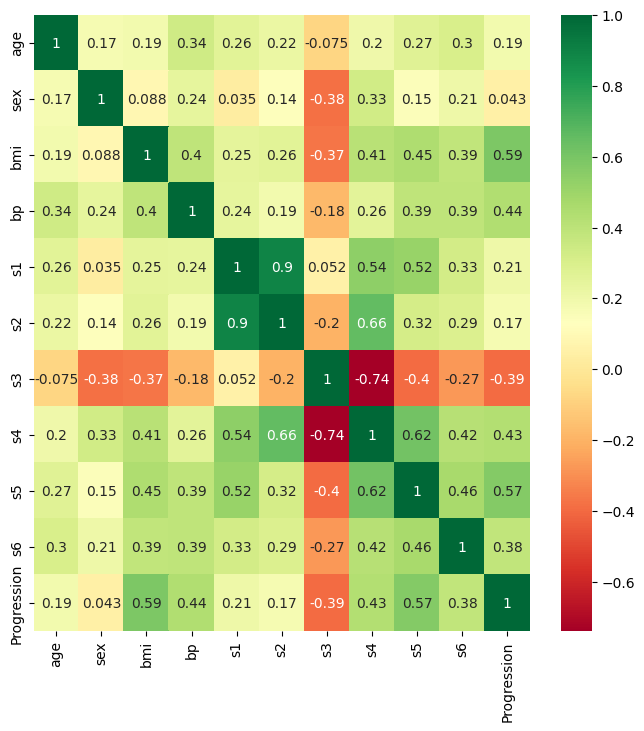

In [14]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

In [15]:
#independent variables / explanatory variables
x = db_df.drop(labels='Progression', axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = db_df['Progression']
     

In [16]:
#splitting the dataset into 75%-25% train-test split 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25,random_state=999)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
     

(331, 10)
(111, 10)
(331,)
(111,)


In [17]:
#let us import the linear regression from sklearn & create instance of the model.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [18]:
print(lm)
print(type(lm))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [19]:
lm.fit(train_x, train_y)

LinearRegression()

In [20]:
predicted_y = lm.predict(test_x)

In [21]:
#let us import metrics from sklearn to evaluate the model. Refer https://scikit-learn.org/stable/modules/model_evaluation.html for more details.
from sklearn import metrics as mt

In [22]:

print("1) The model explains,", np.round(mt.explained_variance_score(test_y,predicted_y)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y,predicted_y),2))
     

1) The model explains, 57.57 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 38.08
3) The R-Square score of the model is  0.56


In [23]:
coeff = pd.Series(lm.coef_, index = train_x.columns)
intercept = lm.intercept_
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")


Coefficients:

age     54.820535
sex   -260.930304
bmi    458.001802
bp     303.502332
s1    -995.584889
s2     698.811401
s3     183.095229
s4     185.698494
s5     838.503887
s6      96.441048
dtype: float64


Intercept:

154.42752615353518


